![image.png](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/images/optimized/rev-7841bc2/www.sharpsightlabs.com/wp-content/uploads/2020/03/numpy-flatten-visua-example.png)

## Introduction

A flattened image refers to the transformation of a two-dimensional array, such as an image represented in a matrix form (like a grid of pixel values), into a one-dimensional array. For example, in the context of image data, a grayscale image of dimensions 28x28 pixels can be reshaped or "flattened" into a single row of 784 (28x28) pixel values. This transformation is essential when using a Multilayer Perceptron (MLP) model, which typically requires inputs to be in a flat format, commonly represented as a single vector or array.

If you're interested in exploring similar data analysis or learning more about AI applications, then checkout my personal website https://hughiephan.co . Don't forget to upvote if you found the notebook insightful or helpful. Your feedback is valuable and can help others discover useful content.

## Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras

## Import dataset

Fashion MNIST is a dataset containing grayscale images of clothing items (like shirts, shoes, dresses, etc.) in 28x28 pixel format, commonly used for learning computer vision tasks. Then we separate it into training and testing subsets, each with their respective images `X` and labels `Y`, which can then be used for training and evaluating

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Normalization

Scale the pixel intensities down to the 0-1 range by dividing them by 255.0 . We also the limit the number of images to 5000 by using `[:5000]` for a faster training time

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

## Define model

Our model architecture is defined sequentially with layers: first, a `Flatten` layer reshapes the `28x28` input images into a flat 1D array. Subsequently, two Dense layers follow, each with ReLU activation functions—`300` neurons in the first layer and `100` neurons in the second. The final Dense layer, consisting of `10` neurons with a softmax activation function, produces probabilities for the `10` classes present in the Fashion MNIST dataset. Our training settings will use `sparse categorical cross-entropy` loss which is suitable for multi-class classification, and Stochastic Gradient Descent `SGD` optimizer, and tracking accuracy as the evaluation metric

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

We start by training the defined model using the `fit` method on the training dataset (X_train and y_train) over 5 epochs. During this process, the model learns from the input features `X_train` and their corresponding target labels `y_train`. Additionally, it validates the model's performance on a separate validation dataset `X_valid` and `y_valid` after each epoch, allowing observation of how well the model generalizes to new, unseen data. Following the training process, the evaluate method is used to assess the model's performance using a different set of unseen data, the test dataset `X_test` and `y_test`. This step provides insights into the model's accuracy and other relevant metrics when confronted with data it hasn't encountered during training

In [5]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test) # Output test_loss and test_accuracy

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7187 - accuracy: 0.7615 - val_loss: 0.5087 - val_accuracy: 0.8256
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4876 - accuracy: 0.8295 - val_loss: 0.4415 - val_accuracy: 0.8502
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4422 - accuracy: 0.8442 - val_loss: 0.4191 - val_accuracy: 0.8510
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4155 - accuracy: 0.8540 - val_loss: 0.4079 - val_accuracy: 0.8606
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8501


[0.4246431291103363, 0.8500999808311462]

## Visualize the Flatten Layer

Seelct the first image from the test dataset, then reshape and normalize to scale its pixel values between 0 and 1. After that, we retrieve the specific layer `flatten` from our previously defined Neural Network, therefore creating a new model that captures the output specifically from this `flatten` layer only. Using this specialized model, it will output the `flatten` layer given the original image. The way of flatten an image like this allows for the use of MLP Neural Network model.

```
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), <------ We are looking at this layer
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
```

1/1 [==============================] - 0s 72ms/step
Original Image


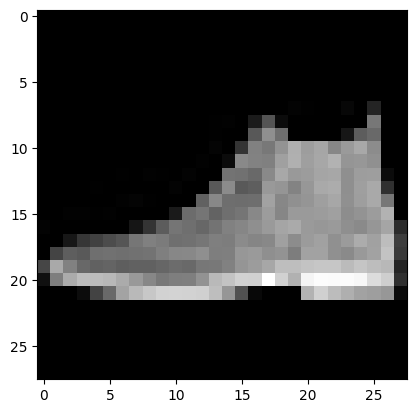

After flatten


In [6]:
image = X_test[0]  
input_data = image.reshape(1, 28, 28) / 255.0
flatten_layer = model.get_layer('flatten')
visualization_model = keras.models.Model(model.input, flatten_layer.output)
output_data = visualization_model.predict(input_data) 
print("Original Image")
plt.imshow(image, cmap="gray")
plt.show()
print("After flatten")
plt.figure(figsize=(100, 50)) 
plt.imshow(output_data, cmap='gray')
plt.axis('off')
plt.show()

## Reference
- https://www.sharpsightlabs.com/blog/numpy-flatten